# Biểu đồ Histogram trong OpenCV

## Histogram là gì?
- Histogram là tập hợp các số liệu được sắp xếp thành một tập hợp các thùng được xác định trước
Khi chúng ta nói đến dữ liệu, chúng ta không giới hạn nó ở các giá trị cường độ (như chúng ta đã thấy trong Hướng dẫn cân bằng Histogram trước đó). Dữ liệu được thu thập có thể là bất kỳ tính năng nào bạn thấy hữu ích để mô tả hình ảnh của mình.
- Hãy cùng xem một ví dụ. Hãy tưởng tượng rằng một Ma trận chứa thông tin của một hình ảnh (tức là cường độ trong phạm vi $0-255$):

<center>
<img src="https://docs.opencv.org/4.x/Histogram_Calculation_Theory_Hist0.jpg">
</center>

- Điều gì xảy ra nếu chúng ta muốn đếm dữ liệu này theo cách có tổ chức? Vì chúng ta biết rằng phạm vi giá trị thông tin cho trường hợp này là 256 giá trị, chúng ta có thể phân đoạn phạm vi của mình thành các phần phụ (gọi là bin) như sau:
$$ [0, 255] = [0, 15] \cup [16, 31] \cup ... \cup [240, 255] $$
$$ range = bin_1 \cup bin_2 \cup ... \cup bin_15$$

- Và chúng ta có thể đếm số lượng pixel nằm trong phạm vi của mỗi . Áp dụng điều này vào ví dụ trên, chúng ta sẽ có hình ảnh bên dưới (trục x biểu diễn các thùng và trục y biểu diễn số lượng pixel trong mỗi thùng).

<center>
<img src="https://docs.opencv.org/4.x/Histogram_Calculation_Theory_Hist1.jpg">
</center>


- Đây chỉ là một ví dụ đơn giản về cách biểu đồ histogram hoạt động và lý do tại sao nó hữu ích. Biểu đồ histogram có thể đếm không chỉ cường độ màu mà còn đếm bất kỳ đặc điểm hình ảnh nào mà chúng ta muốn đo (tức là độ dốc, hướng, v.v.).
- Hãy xác định một số phần của biểu đồ histogram:
    1. `dims`: Số lượng tham số bạn muốn thu thập dữ liệu. Trong ví dụ của chúng tôi, dims = 1 vì chúng tôi chỉ đếm các giá trị cường độ của từng pixel (trong ảnh thang độ xám).
    2. `bins`: Đây là số lượng phân chia trong mỗi dim. Trong ví dụ của chúng tôi, bins = 16
    3. `range`: Giới hạn cho các giá trị được đo. Trong trường hợp này: range = [0,255]
- Còn nếu bạn muốn đếm hai đặc điểm thì sao? Trong trường hợp này, biểu đồ histogram kết quả của bạn sẽ là một biểu đồ 3D (trong đó x và y sẽ là $bin_x$ và $bin_y$
cho mỗi đặc điểm và z sẽ là số lần đếm cho mỗi tổ hợp của $(bin_x, bin_y)$. Tương tự như vậy đối với nhiều đặc điểm hơn (tất nhiên là sẽ khó hơn).

### Những gì OpenCV cung cấp cho bạn

Với mục đích đơn giản, OpenCV triển khai hàm `calcHist()`, hàm này tính toán histogram của một tập hợp các mảng (thường là hình ảnh hoặc mặt phẳng hình ảnh). Nó có thể hoạt động với tối đa 32 chiều. Chúng ta sẽ thấy nó trong mã bên dưới!

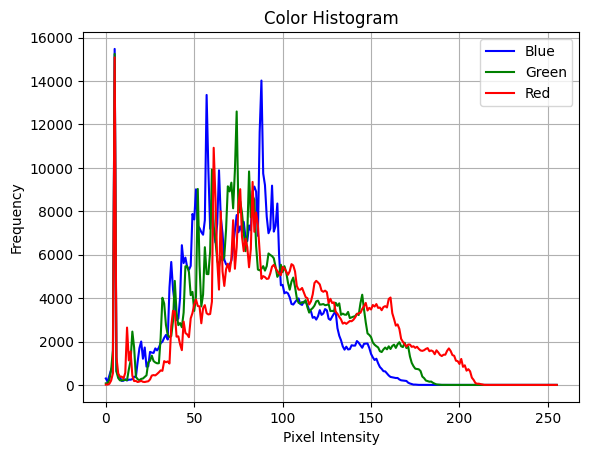

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("images/cat.jpg", cv2.IMREAD_COLOR)

b, g, r = cv2.split(img)

hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])

plt.plot(hist_b, color='blue', label='Blue')
plt.plot(hist_g, color='green', label='Green')
plt.plot(hist_r, color='red', label='Red')
plt.title("Color Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

### Biểu đồ Histogram của hình ảnh là gì?
- Đây là biểu diễn đồ họa về sự phân bố cường độ của một hình ảnh.
- Nó định lượng số lượng pixel cho mỗi giá trị cường độ được xem xét.

<center>
  <img src="https://docs.opencv.org/4.x/Histogram_Equalization_Theory_0.jpg" width="600">
</center>

### Cân bằng Histogram là gì?
- Đây là phương pháp cải thiện độ tương phản trong hình ảnh, nhằm kéo dài phạm vi cường độ (xem thêm mục Wikipedia tương ứng).
- Để làm rõ hơn, từ hình ảnh trên, bạn có thể thấy rằng các điểm ảnh có vẻ tập trung xung quanh giữa phạm vi cường độ khả dụng. Histogram Equalization thực hiện việc kéo dài phạm vi này. Hãy xem hình bên dưới: Các vòng tròn màu xanh lá cây biểu thị cường độ không có nhiều. Sau khi áp dụng cân bằng, chúng ta sẽ có một histogram như hình ở giữa. Hình ảnh kết quả được hiển thị trong hình bên phải.

<center>
  <img src="https://docs.opencv.org/4.x/Histogram_Equalization_Theory_1.jpg" width="600">
</center>


### Nó hoạt động như thế nào?
- Cân bằng ngụ ý ánh xạ một phân phối (biểu đồ histogram đã cho) sang một phân phối khác (phân phối rộng hơn và đồng đều hơn các giá trị cường độ) để các giá trị cường độ được trải rộng trên toàn bộ phạm vi.
- Để đạt được hiệu ứng cân bằng, việc ánh xạ lại phải là hàm phân phối tích lũy (cdf) (chi tiết hơn, hãy tham khảo Học OpenCV). Đối với biểu đồ histogram
$H(i)$, phân phối tích lũy $H'(i)$ là:

$$ H'(i) = \sum_{0\leq j<i}{H(i)}$$

Để sử dụng điều này như một hàm ánh xạ lại, chúng ta phải chuẩn hóa $H'(i)$ sao cho giá trị lớn nhất là 255 (hoặc giá trị lớn nhất cho cường độ của hình ảnh). Từ ví dụ trên, hàm tích lũy là:
<center>
  <img src="https://docs.opencv.org/4.x/Histogram_Equalization_Theory_2.jpg" alt="Histogram Equalization" width="200">
</center>

- Cuối cùng, chúng tôi sử dụng một thủ tục ánh xạ lại đơn giản để có được các giá trị cường độ của hình ảnh được cân bằng:
$$ equalized(x,y) = H'(src(x,y)) $$

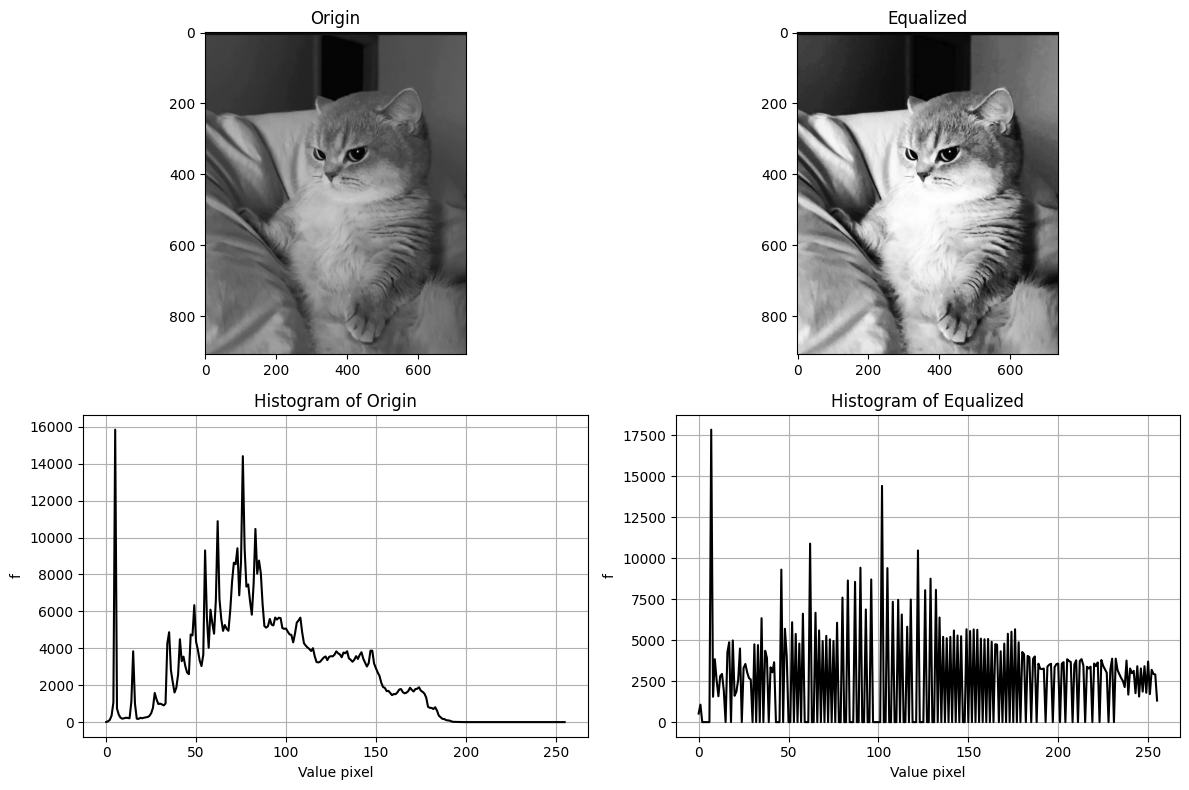

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển sang ảnh xám
src = cv2.imread("images/cat.jpg")
src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# Cân bằng histogram
dst = cv2.equalizeHist(src)

# Tính histogram của ảnh gốc và ảnh sau khi equalize
hist_src = cv2.calcHist([src], [0], None, [256], [0, 256])
hist_dst = cv2.calcHist([dst], [0], None, [256], [0, 256])

# Vẽ ảnh và biểu đồ
plt.figure(figsize=[12, 8])

plt.subplot(221); plt.imshow(src, cmap="gray"); plt.title("Origin")
plt.subplot(222); plt.imshow(dst, cmap="gray"); plt.title("Equalized")

plt.subplot(223); plt.plot(hist_src, color='black'); plt.title("Histogram of Origin"); plt.xlabel("Value pixel"); plt.ylabel("f"); plt.grid(True)
plt.subplot(224); plt.plot(hist_dst, color='black'); plt.title("Histogram of Equalized"); plt.xlabel("Value pixel"); plt.ylabel("f"); plt.grid(True)

plt.tight_layout()
plt.show()


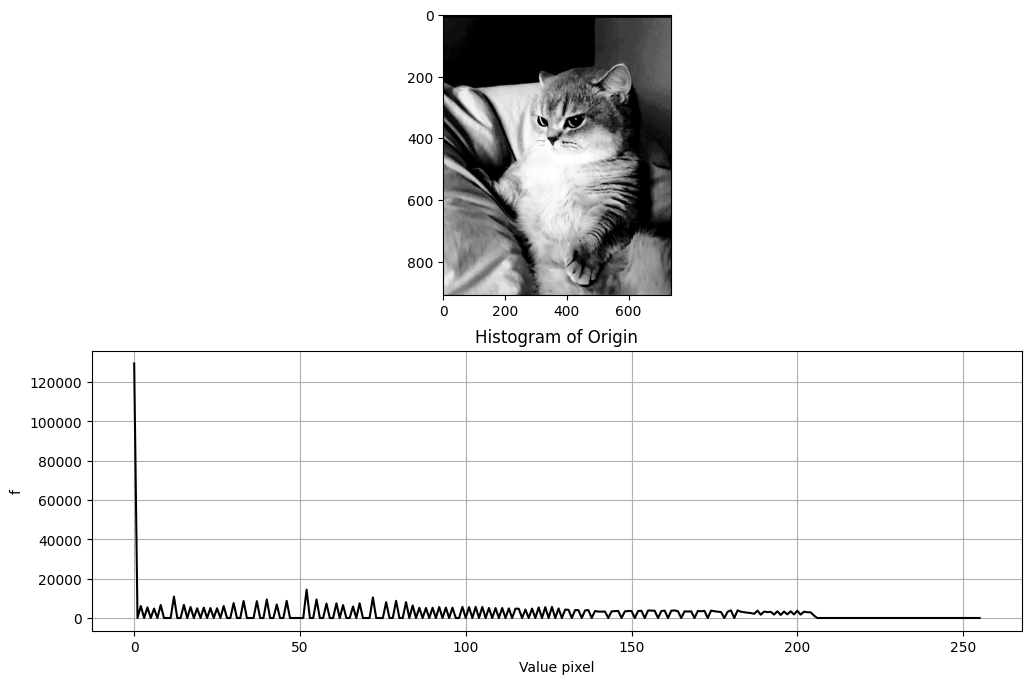

In [33]:
matrix = np.ones(dst.shape, dtype="uint8") * 50
img    = np.uint8(cv2.subtract(dst, matrix))
hist   = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.figure(figsize=[12, 8])
plt.subplot(211); plt.imshow(img, cmap="gray")
plt.subplot(212); plt.plot(hist, color='black'); plt.title("Histogram of Origin"); plt.xlabel("Value pixel"); plt.ylabel("f"); plt.grid(True)
